### Figures for article 'Is the Fate of Deep Convective Systems written form the start?'

In [2]:
# Standard Libraries
import os
import sys
import argparse
import h5py

# Scientific Libraries
import numpy as np
import pandas as pd
import xarray as xr
import joblib
from scipy.stats import gaussian_kde, percentileofscore, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# Plotting Libraries
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Cartopy (for mapping)
import cartopy.crs as ccrs

# TQDM for progress bars
from tqdm import tqdm

# Local Imports
module_dir = '/home/b/b381993'
sys.path.append(module_dir)
from DeepFate import config
from DeepFate.important_features.utils_important_features import get_datasets
from DeepFate.figures.utils_figures import *

# Jupyter-specific for autoreload
%load_ext autoreload
%autoreload 2


In [19]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 14})

path_figures = '/home/b/b381993/DeepFate/figures/figures_article'

In [4]:
#read physical field for a dcs
filename = '/work/bb1153/b381993/data/VERSION_FEBRUARY_2025_3D_v3/DEEPFATE_DATASET.h5'
index=500
with h5py.File(filename, 'r') as f:
    images_i = f['X'][index]
    specs_i = f['z'][index]
    y_i = f['y'][index]

X_all = images_i

In [22]:
### Figure 1

/home/b/b381993/miniforge3/envs/my_new_env/lib/python3.10/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'cloud_mask' has multiple fill values {np.float32(-999.0), np.float32(-998.0)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/home/b/b381993/miniforge3/envs/my_new_env/lib/python3.10/site-packages/xarray/conventions.py:193: SerializationWarning: variable 'mcs_mask' has multiple fill values {np.float32(-999.0), np.float32(-998.0)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


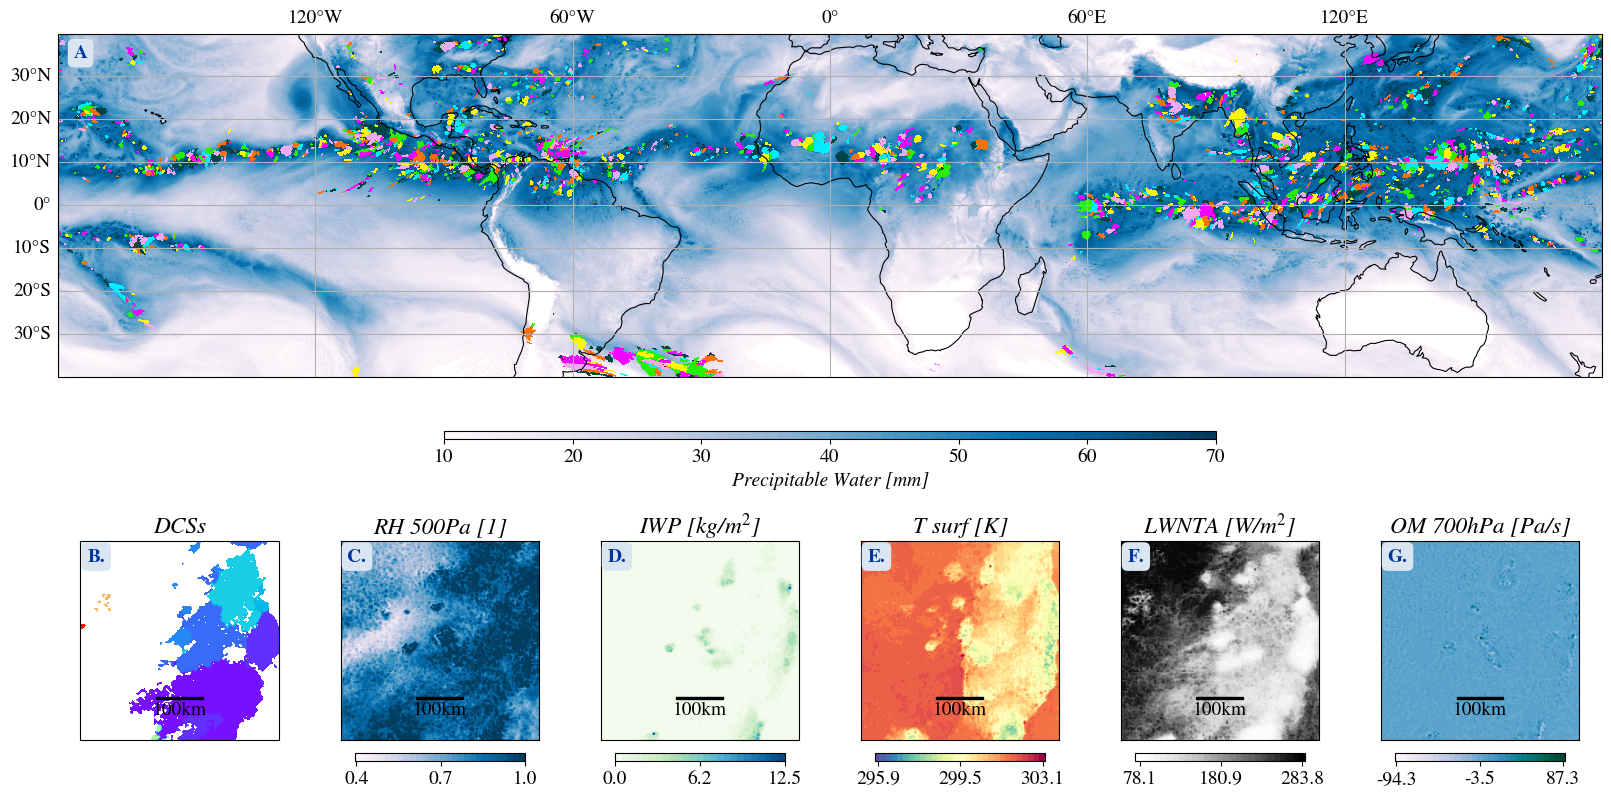

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import os

# Initialize the figure and grid
fig = plt.figure(layout="constrained", figsize=(16,9))
gs = GridSpec(140, 60, figure=fig)

# Define subplots
ax1 = fig.add_subplot(gs[100:, :10])
ax2 = fig.add_subplot(gs[100:, 10:20])
ax3 = fig.add_subplot(gs[100:, 20:30])
ax4 = fig.add_subplot(gs[100:, 30:40])
ax5 = fig.add_subplot(gs[100:, 40:50])
ax6 = fig.add_subplot(gs[100:, 50:60])
ax = fig.add_subplot(gs[:97, :], projection=ccrs.PlateCarree())

# Colormap and title definitions
cmap_list = ['rainbow', 'PuBu', 'GnBu', 'Spectral_r', 'Greys', 'PuBuGn', 'Spectral']
title_list = ['DCSs', 'RH 500Pa [1]', 'IWP [kg/m$^2$]', 'T surf [K]', 'LWNTA [W/m$^2$]', 'OM 700hPa [Pa/s]']


i_time = 2
# Loop through variables and subplots
for i, (iv, axx) in enumerate(zip([0, 3, 6, 5, 1, 11], [ax1, ax2, ax3, ax4, ax5, ax6])):
    scalebar = AnchoredSizeBar(axx.transData, 30, '100km', 'lower center', pad=1, color='k', frameon=False, size_vertical=1)
    
    if title_list[i] == 'Neighbours':
        map_X = X_all[i_time, iv, :, :] % 10
        im = axx.contourf(map_X, 30, cmap=cmap_list[i], alpha=0.8)
        axx.contourf(X_all[0, i_time, :, :], 30, cmap=cmap_list[i])
    elif iv == 11:
        im = axx.contourf(X_all[i_time, iv, :, :], 30, cmap=cmap_list[i], vmin=-10, vmax=10)
    else:
        im = axx.contourf(X_all[i_time, iv, :, :], 30, cmap=cmap_list[i])
    
    vmin_im2, vmax_im2 = np.min(X_all[i_time, iv, :, :]), np.max(X_all[i_time, iv, :, :])
    t = np.linspace(vmin_im2, vmax_im2, 3)
    axx.add_artist(scalebar)
    axx.set_xticks([])
    axx.set_yticks([])
    axx.set_title(title_list[i], fontstyle='italic')
    
    if title_list[i] not in ['DCSs', 'Neighbours']:
        im.set_clim(np.min(X_all[i_time, iv, :, :]), np.max(X_all[i_time, iv, :, :]))
        cb = fig.colorbar(im, ax=axx, orientation='horizontal', ticks=t, aspect=20, shrink=0.7, format='%.1f')
    
    axx.set_aspect('equal')

# Bottom plot
i_0 = 1000
PW_np, img_seg_np_mod = get_data_dyamond_toocan(i=i_0, path_relation_table=config.PATH_RELATION_TABLE)
im = ax.contourf(PW_np, COLORBAR_TICKS, origin='upper', extent=IMG_EXTENT, transform=ccrs.PlateCarree(), cmap='PuBu', vmin=10, vmax=70)
ax.contourf(img_seg_np_mod, origin='upper', extent=IMG_EXTENT, transform=ccrs.PlateCarree(), cmap=CMAP_MCS)
ax.coastlines(resolution='110m', color='black', linewidth=0.8)

cb = plt.colorbar(im, shrink=0.5, aspect=100, orientation='horizontal', pad=0.1, ticks=COLORBAR_TICKS[::10])
cb.set_label(label=f'{FULL_NAME_VARIABLE}', fontstyle='italic')

# Add grid lines
gl = ax.gridlines(draw_labels=True)
gl.bottom_labels = False
gl.right_labels = False

# Labeling subplots
labels = ['A', 'B.', 'C.', 'D.', 'E.', 'F.', 'G.']
pnas_bg_color = '#d9e6f2'
pnas_text_color = '#0033a0'

for i, ax_subi in enumerate([ax, ax1, ax2, ax3, ax4, ax5, ax6]):
    ax_subi.text(0.01 if ax_subi == ax else 0.035, 0.93 if ax_subi == ax else 0.9, labels[i], 
                 transform=ax_subi.transAxes, weight='bold', color=pnas_text_color, 
                 bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3'))

# Save the figure
path_to_save = os.path.join(path_figures, 'figure_1.png')
plt.savefig(path_to_save)


In [ ]:
### Figure 2

In [3]:
###CHANGE WITH YOUR PATH TO YOUR DATA

# Load train and test datasets
root_dir = '/work/bb1153/b381993/data/VERSION_FEBRUARY_2025_3D_for_september_systems/'
df_train = pd.read_csv(os.path.join(root_dir, 'fusion_train_dataset.csv'))
df_test = pd.read_csv(os.path.join(root_dir, 'fusion_test_dataset.csv'))
len(df_train)+len(df_test)

68913

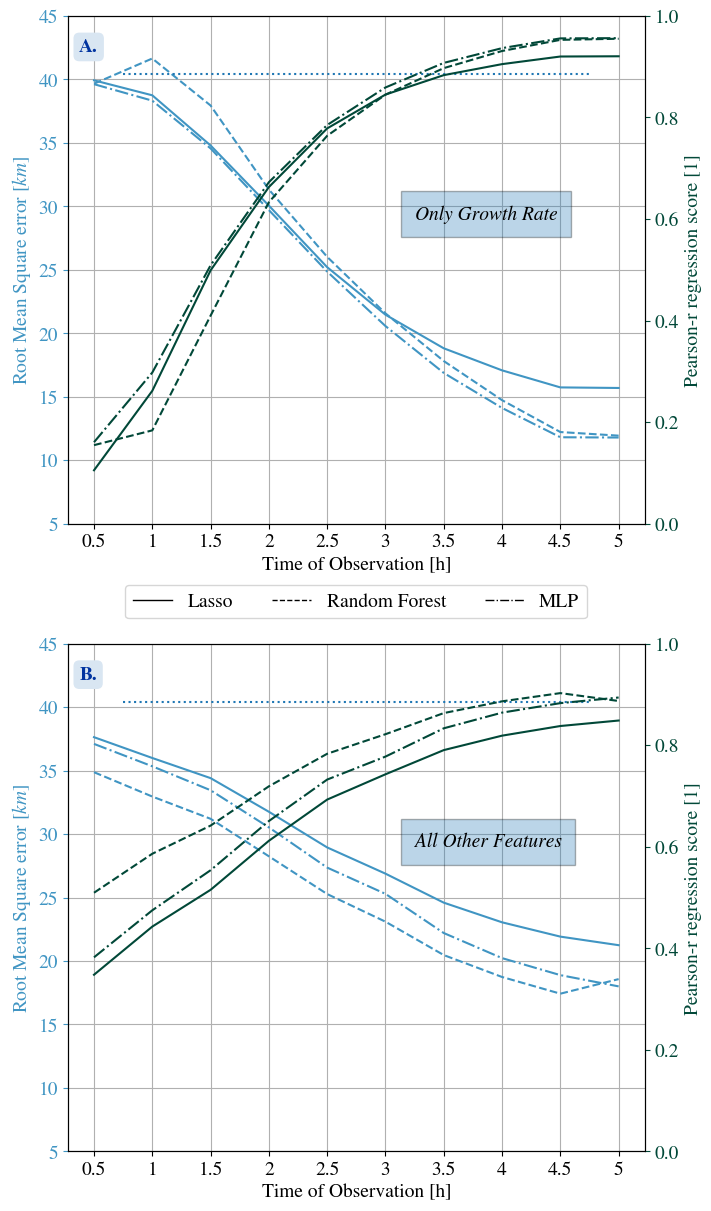

In [26]:
# Load data
list_pearsonr_only_growth_rate = []
list_rmse_only_growth_rate = []
list_pearsonr_all_features = []
list_rmse_all_features = []

def load_metrics(model_str, only_growth_rate=False):
    suffix = "_only_growth_rate" if only_growth_rate else ""
    rmse_list = np.loadtxt(f'/home/b/b381993/DeepFate/metrics/saved_metrics/rmse_list_{model_str}{suffix}.txt')
    pearsonr_list = np.loadtxt(f'/home/b/b381993/DeepFate/metrics/saved_metrics/pearsonr_list_{model_str}{suffix}.txt')
    return rmse_list, pearsonr_list

# Loading data for both only_growth_rate and all_features
for model_str in ['lasso', 'rf', 'mlp']:
    rmse, pearson = load_metrics(model_str, only_growth_rate=True)
    list_pearsonr_only_growth_rate.append(pearson)
    list_rmse_only_growth_rate.append(rmse)

    rmse, pearson = load_metrics(model_str)
    list_pearsonr_all_features.append(pearson)
    list_rmse_all_features.append(rmse)

# PLOT
fig, ax = plt.subplots(2, 1, figsize=(7, 12), constrained_layout=True)
cmap_color = plt.get_cmap('PuBuGn')
color_rmse = cmap_color(0.6)
color_r = cmap_color(0.99)

legend_elements = [
    Line2D([0], [0], color='k', lw=1, linestyle='-', label='Lasso'),
    Line2D([0], [0], color='k', lw=1, linestyle='--', label='Random Forest'),
    Line2D([0], [0], color='k', lw=1, linestyle='-.', label='MLP')
]

def plot_data(ax, ax2, list_rmse, list_pearson, title):
    label_list = ['Lasso', 'Random Forest', 'MLP']
    linestyle_list = ['-', '--', '-.']
    x = ['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5']

    for i, (rmse, pearson) in enumerate(zip(list_rmse, list_pearson)):
        ax.plot(x, rmse, linestyle_list[i], color=color_rmse)
        ax2.plot(x, pearson, linestyle_list[i], color=color_r, label=label_list[i])

    ax.set_xticks(x)
    ax2.set_ylim(0, 1)
    ax.set_ylim(5, 45)
    ax.hlines(np.sqrt(np.var(df_train['y_max_extend'])), 0.5, 8.5, linestyle='dotted')
    ax.grid(True)

    ax2.yaxis.label.set_color(color_r)
    ax2.tick_params(axis='y', colors=color_r)
    ax.yaxis.label.set_color(color_rmse)
    ax.tick_params(axis='y', colors=color_rmse)

    ax.set_xlabel('Time of Observation [h]')
    ax.set_ylabel(r'Root Mean Square error [$km$]')
    ax2.set_ylabel(r'Pearson-r regression score [1]')
    
    ax.text(5.5, 29.0, title, style='italic', bbox={'facecolor': 'tab:blue', 'alpha': 0.3, 'pad': 10})

# Top subplot: Only Growth Rate
ax2_top = ax[0].twinx()
plot_data(ax[0], ax2_top, list_rmse_only_growth_rate, list_pearsonr_only_growth_rate, 'Only Growth Rate')

# Bottom subplot: All Features
ax2_bottom = ax[1].twinx()
plot_data(ax[1], ax2_bottom, list_rmse_all_features, list_pearsonr_all_features, 'All Other Features')

# Add legend
plt.legend(handles=legend_elements, loc='upper center', borderaxespad=-3, ncol=3)

# Annotations for subplot labels (A., B.)
labels = ['A.', 'B.']
pnas_bg_color = '#d9e6f2'
pnas_text_color = '#0033a0'

for i, ax_sub in enumerate(ax):
    ax_sub.text(
        0.02, 0.93, labels[i],
        transform=ax_sub.transAxes,
        weight='bold',
        color=pnas_text_color,
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')
    )

# Save figure
path_to_save = os.path.join(path_figures, 'figure_2.pdf')
plt.savefig(path_to_save)

In [27]:
### Figure 3

In [28]:
# Load the trained pipeline model (for example, 'pipeline_rf_1.pkl')
pipeline_lasso_3 = joblib.load('/home/b/b381993/DeepFate/models/saved_models/pipeline_lasso_3.pkl')
pipeline_lasso_4 = joblib.load('/home/b/b381993/DeepFate/models/saved_models/pipeline_lasso_4.pkl')

In [29]:

train_dataset_raw = pd.read_csv('/work/bb1153/b381993/data/VERSION_MARCH_NEW_INTERPRETABLE/train_dataset.csv')
test_dataset_raw = pd.read_csv('/work/bb1153/b381993/data/VERSION_MARCH_NEW_INTERPRETABLE/test_dataset.csv')



print(len(train_dataset_raw), len(test_dataset_raw))

blacklist_exp = ['gradient_area', 'average_diameter', 'mcs_area']
dict_exp = {
    'df_train': train_dataset_raw,
    'df_test': test_dataset_raw,
    'all_features': True,
    'one_features_name': '',
    'blacklist': blacklist_exp
}

# Iterate over a range of timesteps for evaluation
#for nt_eval in range(1, 10):

# Get the processed training and test datasets
train_dataset_3, test_dataset_3 = get_datasets(
    all_features=dict_exp['all_features'],
    df_train=dict_exp['df_train'],
    df_test=dict_exp['df_test'],
    one_features_name=dict_exp['one_features_name'],
    blacklist=dict_exp['blacklist'],
    nb_timesteps=3
)

train_dataset_4, test_dataset_4 = get_datasets(
    all_features=dict_exp['all_features'],
    df_train=dict_exp['df_train'],
    df_test=dict_exp['df_test'],
    one_features_name=dict_exp['one_features_name'],
    blacklist=dict_exp['blacklist'],
    nb_timesteps=4)


y_train = train_dataset_raw['y_max_extend']
y_test = test_dataset_raw['y_max_extend']

51684 17229


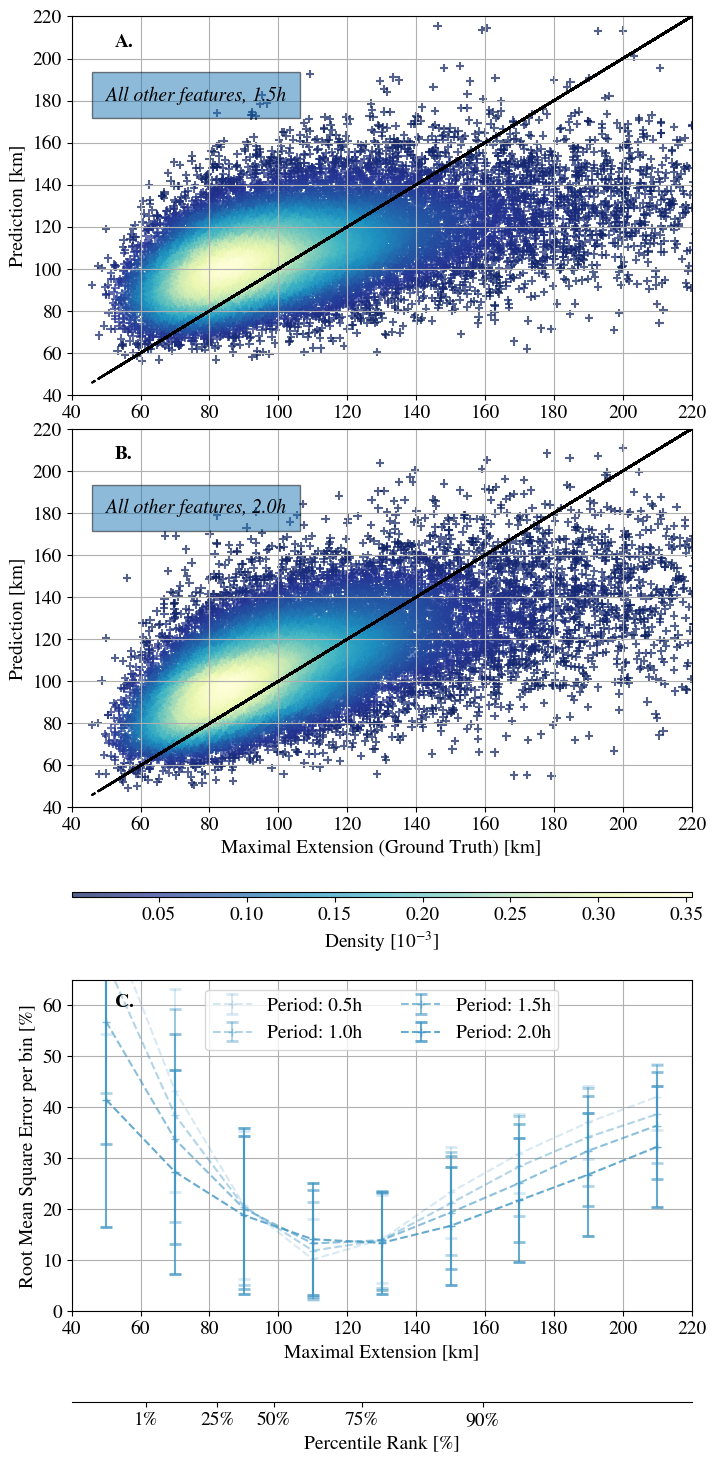

In [30]:
# Define constants and settings
nbins = np.arange(40, 240, 20)
cmap_color = plt.get_cmap('PuBuGn')
color_rmse, color_r = cmap_color(0.6), cmap_color(0.99)

fig, axs = plt.subplots(7, 1, figsize=(8, 18), gridspec_kw={'height_ratios': [32, 32, 5, 1, 28,1, 1]})
ax1, ax2, ax4, ax_ghost, ax3, ax_ghost_2, ax33 = axs



# Define a function to handle repetitive scatter plot creation
def scatter_plot(ax, nb_timesteps, test_dataset, pipeline_lasso, y_test, title_text):
    y_preds = pipeline_lasso.predict(test_dataset)
    x, y = y_preds, y_test
    z = gaussian_kde(np.vstack([x, y]))(np.vstack([x, y]))
    im = ax.scatter(y_test, y_preds, marker='+', c=1000*z, alpha=0.7, cmap='YlGnBu_r')
    ax.plot(y, y, 'k--')
    ax.set_xlim(40, 220)
    ax.set_ylim(40, 220)
    ax.grid(True)
    ax.set_ylabel('Prediction [km]')
    ax.text(50, 180, title_text, style='italic', bbox={'facecolor': 'tab:blue', 'alpha': 0.5, 'pad': 10})
    return im

# Plot on ax1 and ax2
y_preds3, y_preds4 = pipeline_lasso_3.predict(test_dataset_3), pipeline_lasso_4.predict(test_dataset_4)
scatter_plot(ax1, 3, test_dataset_3, pipeline_lasso_3, y_test, f'All other features, {3/2}h')
im = scatter_plot(ax2, 4, test_dataset_4, pipeline_lasso_4, y_test, f'All other features, {4/2}h')
ax2.set_xlabel('Maximal Extension (Ground Truth) [km]')
ax2.set_ylabel('Prediction [km]')

# Add colorbar to ax4
# Add colorbar to ax4, setting it above the scatter plot


fig.colorbar(im, ax=ax4, orientation='horizontal', label=r'Density [$10^{-3}$]', aspect=110, pad=10.0)
ax_ghost.axis('off')
ax4.axis('off')

# Plot error bars on ax3
for nb_timesteps in [1, 2, 3, 4]:

    train_dataset, test_dataset = get_datasets(all_features=dict_exp['all_features'], 
                                               df_train=dict_exp['df_train'], 
                                               df_test =dict_exp['df_test'], 
                                               one_features_name =dict_exp['one_features_name'], 
                                               blacklist =dict_exp['blacklist'], 
                                               nb_timesteps=nb_timesteps)
    pipeline_lasso = joblib.load(f'/home/b/b381993/DeepFate/models/saved_models/pipeline_lasso_{nb_timesteps}.pkl')
    y_preds = pipeline_lasso.predict(test_dataset)
    
    yy = 100 * (np.sqrt((y_preds - y_test) ** 2) / y_test)
    n, _ = np.histogram(y_test, bins=nbins)
    mean = np.histogram(y_test, bins=nbins, weights=yy)[0] / n
    std = np.sqrt(np.histogram(y_test, bins=nbins, weights=yy**2)[0] / n - mean**2)
    
    ax3.errorbar((_[1:] + _[:-1]) / 2, mean, yerr=std, fmt='+--', color=color_rmse, label=f'Period: {nb_timesteps * 0.5}h', alpha=nb_timesteps / 5, capsize=4, capthick=2)

ax3.set_xlim(40, 220)
ax3.set_ylim(0, 65)
ax3.set_xlabel('Maximal Extension [km]')
ax3.set_ylabel('Root Mean Square Error per bin [%]')
ax3.legend(ncol=2, loc='upper center')
ax3.grid(True)

# Configure ax33 for percentile ticks
quantile_size = [np.quantile(y_test, i / 100) for i in range(1, 101)]
percentiles_for_ticks = [1, 25, 50, 75, 90, 100]
ticks_values = np.percentile(quantile_size, percentiles_for_ticks)
ax33.set_xticks(ticks_values)
ax33.set_xticklabels([f'{p}%' for p in percentiles_for_ticks])
ax33.yaxis.set_visible(False)
ax33.set_xlim(40, 220)
ax33.set_xlabel('Percentile Rank [%]')
ax33.spines['top'].set_visible(False)
ax33.spines['right'].set_visible(False)
ax33.spines['left'].set_visible(False)
ax33.spines['bottom'].set_position('zero')

ax_ghost_2.axis('off')


# Add subplot labels
for ax, label in zip([ax1, ax2, ax3], ['A.', 'B.', 'C.']):
    ax.text(0.07, 0.92, label, transform=ax.transAxes, weight='bold')

# Save figure
path_to_save = os.path.join(path_figures, 'figure_3.pdf')
plt.savefig(path_to_save)


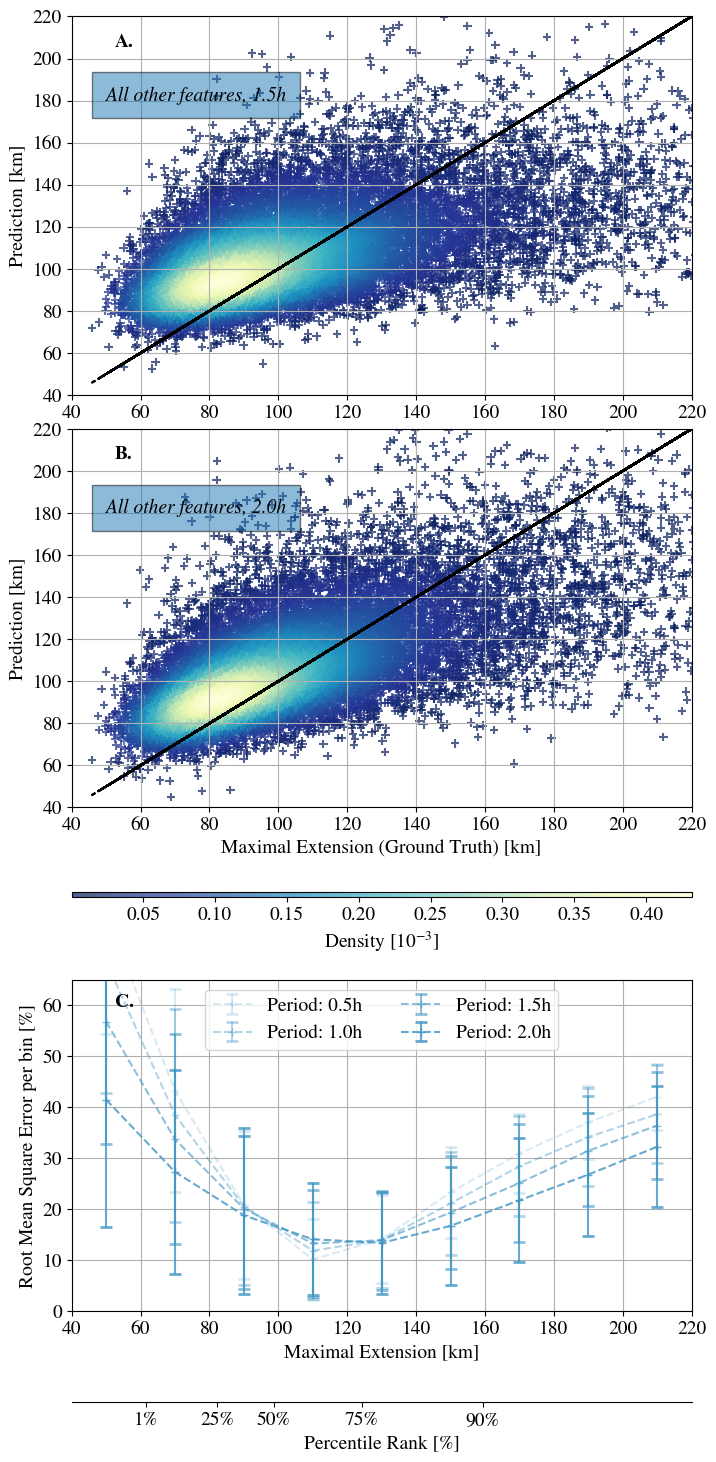

In [43]:
pipeline_mlp_3 = joblib.load('/home/b/b381993/DeepFate/models/saved_models/pipeline_mlp_3.pkl')
pipeline_mlp_4 = joblib.load('/home/b/b381993/DeepFate/models/saved_models/pipeline_mlp_4.pkl')

# Define constants and settings
nbins = np.arange(40, 240, 20)
cmap_color = plt.get_cmap('PuBuGn')
color_rmse, color_r = cmap_color(0.6), cmap_color(0.99)

fig, axs = plt.subplots(7, 1, figsize=(8, 18), gridspec_kw={'height_ratios': [32, 32, 5, 1, 28,1, 1]})
ax1, ax2, ax4, ax_ghost, ax3, ax_ghost_2, ax33 = axs



# Define a function to handle repetitive scatter plot creation
def scatter_plot(ax, nb_timesteps, test_dataset, pipeline_lasso, y_test, title_text):
    y_preds = pipeline_lasso.predict(test_dataset)
    x, y = y_preds, y_test
    z = gaussian_kde(np.vstack([x, y]))(np.vstack([x, y]))
    im = ax.scatter(y_test, y_preds, marker='+', c=1000*z, alpha=0.7, cmap='YlGnBu_r')
    ax.plot(y, y, 'k--')
    ax.set_xlim(40, 220)
    ax.set_ylim(40, 220)
    ax.grid(True)
    ax.set_ylabel('Prediction [km]')
    ax.text(50, 180, title_text, style='italic', bbox={'facecolor': 'tab:blue', 'alpha': 0.5, 'pad': 10})
    return im

# Plot on ax1 and ax2
y_preds3, y_preds4 = pipeline_mlp_3.predict(test_dataset_3), pipeline_mlp_4.predict(test_dataset_4)
scatter_plot(ax1, 3, test_dataset_3, pipeline_mlp_3, y_test, f'All other features, {3/2}h')
im = scatter_plot(ax2, 4, test_dataset_4, pipeline_mlp_4, y_test, f'All other features, {4/2}h')
ax2.set_xlabel('Maximal Extension (Ground Truth) [km]')
ax2.set_ylabel('Prediction [km]')

# Add colorbar to ax4
# Add colorbar to ax4, setting it above the scatter plot


fig.colorbar(im, ax=ax4, orientation='horizontal', label=r'Density [$10^{-3}$]', aspect=110, pad=10.0)
ax_ghost.axis('off')
ax4.axis('off')

# Plot error bars on ax3
for nb_timesteps in [1, 2, 3, 4]:

    train_dataset, test_dataset = get_datasets(all_features=dict_exp['all_features'], 
                                               df_train=dict_exp['df_train'], 
                                               df_test =dict_exp['df_test'], 
                                               one_features_name =dict_exp['one_features_name'], 
                                               blacklist =dict_exp['blacklist'], 
                                               nb_timesteps=nb_timesteps)
    pipeline_lasso = joblib.load(f'/home/b/b381993/DeepFate/models/saved_models/pipeline_lasso_{nb_timesteps}.pkl')
    y_preds = pipeline_lasso.predict(test_dataset)
    
    yy = 100 * (np.sqrt((y_preds - y_test) ** 2) / y_test)
    n, _ = np.histogram(y_test, bins=nbins)
    mean = np.histogram(y_test, bins=nbins, weights=yy)[0] / n
    std = np.sqrt(np.histogram(y_test, bins=nbins, weights=yy**2)[0] / n - mean**2)
    
    ax3.errorbar((_[1:] + _[:-1]) / 2, mean, yerr=std, fmt='+--', color=color_rmse, label=f'Period: {nb_timesteps * 0.5}h', alpha=nb_timesteps / 5, capsize=4, capthick=2)

ax3.set_xlim(40, 220)
ax3.set_ylim(0, 65)
ax3.set_xlabel('Maximal Extension [km]')
ax3.set_ylabel('Root Mean Square Error per bin [%]')
ax3.legend(ncol=2, loc='upper center')
ax3.grid(True)

# Configure ax33 for percentile ticks
quantile_size = [np.quantile(y_test, i / 100) for i in range(1, 101)]
percentiles_for_ticks = [1, 25, 50, 75, 90, 100]
ticks_values = np.percentile(quantile_size, percentiles_for_ticks)
ax33.set_xticks(ticks_values)
ax33.set_xticklabels([f'{p}%' for p in percentiles_for_ticks])
ax33.yaxis.set_visible(False)
ax33.set_xlim(40, 220)
ax33.set_xlabel('Percentile Rank [%]')
ax33.spines['top'].set_visible(False)
ax33.spines['right'].set_visible(False)
ax33.spines['left'].set_visible(False)
ax33.spines['bottom'].set_position('zero')

ax_ghost_2.axis('off')


# Add subplot labels
for ax, label in zip([ax1, ax2, ax3], ['A.', 'B.', 'C.']):
    ax.text(0.07, 0.92, label, transform=ax.transAxes, weight='bold')

# Save figure
path_to_save = os.path.join(path_figures, 'figure_3.pdf')
# plt.savefig(path_to_save)


In [31]:
### Figure 4

In [32]:
from DeepFate.important_features.utils_important_features import get_features_importance_pipeline, get_sys_env_terms

features_selected_names, values_features, index_argsort = get_features_importance_pipeline(pipeline_path='/home/b/b381993/DeepFate/models/saved_models/pipeline_lasso_3.pkl',
                                                                                            model_str='lasso',
                                                                                              df_train=train_dataset_3)
df_names = pd.read_csv('/home/b/b381993/DeepFate/notebooks/name_dict_new_var.csv')
"""
df_names['Name Plot'] = df_names['Name Plot'].replace(
    to_replace=r'migration_distance_t(\d)\*',  # Regex pattern to match t0*, t1*, ..., t9*
    value=r'migration_distance_t\1',           # Replace with migration_distance_t0, t1, ..., t9
    regex=True
)
"""
new_features_selected_names= [df_names[df_names['Old Name']==features_selected_names[i]]['Name Plot'].values[0] for i in range(len(features_selected_names))]


In [33]:
from DeepFate.important_features.utils_important_features import get_features_importance_pipeline, get_sys_env_terms

#coefs = values_features
# Separate features into system and environment based on the '*' in names
idx_sys = np.array(['*' in item for item in new_features_selected_names[:15]])
sys = np.where(idx_sys)[0]
env = np.where(~idx_sys)[0]

X_transformed1 = pipeline_lasso_3.named_steps['remove_correlated'].transform(train_dataset_3)
X_transformed2 = pipeline_lasso_3.named_steps['feature_selection'].transform(X_transformed1)
X_transformed = pipeline_lasso_3.named_steps['scaler'].transform(X_transformed2)

print(len(values_features))
aa, bb =  get_sys_env_terms(X_input=X_transformed[:,index_argsort], coefs=values_features, index_sys=sys, index_env=env)

y_train = train_dataset_raw['y_max_extend']

64


In [34]:
print(new_features_selected_names[:15])
for_paper_name = ['std IWP*','std IWP (total)', 'migration distance', 'mean LWNTA*', 'eccentricity (core)', 
                  'mean IWP (total)', 'std MSE*', 'landmask', 'mean OM850hPa*','mean OM700hPa*', 'mean LWTNA', 'mean RH500*',  'initial std LWTNA*',
                  'initial std OM700hPa*','initial deep shear*' ]

['std_uc_v6_t2*', 'std_ts_v6_t2', 'migration_distance_t2*', 'mn_uc_v1_t2*', 'eccentricity_core_t1*', 'mn_ts_v6_t2', 'std_uc_v17_t2*', 'mn_ts_v9_t1', 'mn_uc_v12_t2*', 'mn_uc_v4_t2*', 'mn_ts_v1_t2', 'mn_uc_v3_t2*', 'std_uc_v1_t0*', 'std_uc_v4_t0*', 'std_uc_v14_t0*']


/home/b/b381993/miniforge3/envs/my_new_env/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.draw()


/home/b/b381993/miniforge3/envs/my_new_env/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  func(*args, **kwargs)
/home/b/b381993/miniforge3/envs/my_new_env/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


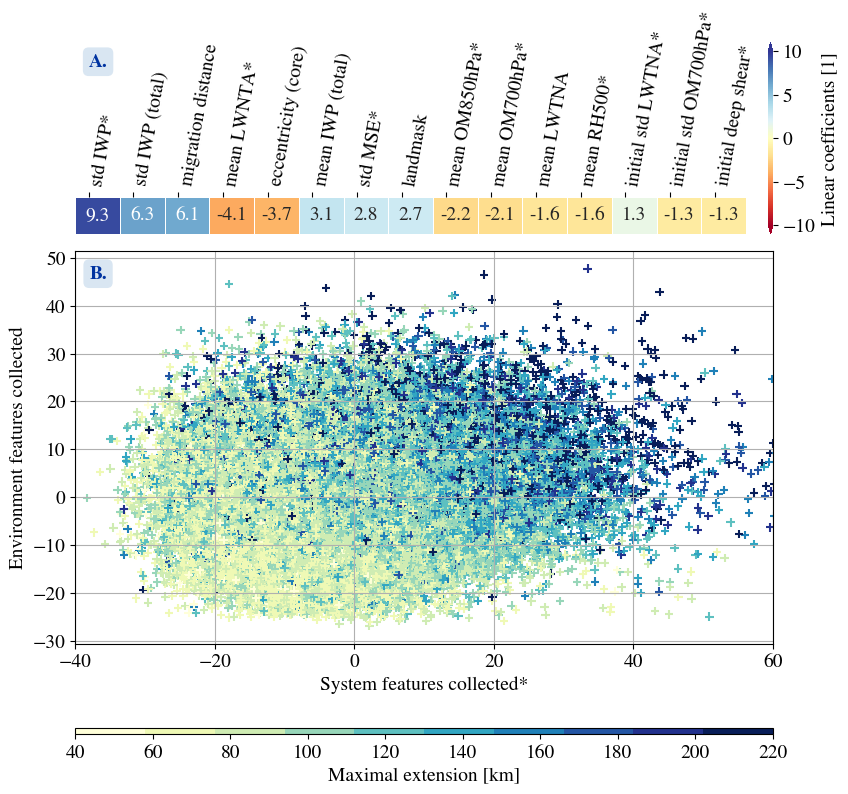

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Set up figure and grid layout
fig = plt.figure(figsize=(9, 11), constrained_layout=True)
gs = GridSpec(110, 130, figure=fig)

# Define axes
ax1 = fig.add_subplot(gs[30:35, :125])
ax2 = fig.add_subplot(gs[10:35, 129:])
ax3 = fig.add_subplot(gs[37:110, :])

# Data for heatmap (example data)
data = np.array([values_features[:15]])

# Create heatmap
sns.heatmap(
    data, 
    annot=True, 
    cmap='RdYlBu', 
    vmin=-10, vmax=10, 
    fmt=".1f", 
    linewidth=0.5, 
    cbar_ax=ax2, 
    ax=ax1, 
    cbar_kws={'label': 'Linear coefficients [1]', 'aspect': '110', 'orientation': 'vertical', 'shrink': '0.6', 'extend': 'both'}
)

# Adjust heatmap axes
ax1.xaxis.tick_top()
ax1.set_xticks(np.arange(data.shape[1]) + 0.3)
ax1.set_xticklabels(for_paper_name[:15], rotation=80, ha='left')
ax1.get_yaxis().set_visible(False)

# Create scatter plot
color = y_train
cmap = plt.get_cmap('YlGnBu', 10)
im = ax3.scatter(aa, bb, c=color, cmap=cmap, marker='+')
im.set_clim(40, 220)

# Adjust scatter plot axes
ax3.set_xlim(-40, 60)
ax3.set_xlabel('System features collected*')
ax3.set_ylabel('Environment features collected')

# Add colorbar to scatter plot
fig.colorbar(im, orientation='horizontal', label='Maximal extension [km]', aspect=110, pad=0.15, ax=ax3)

# Grid for scatter plot
ax3.grid(True)

# Add labels to subplots
labels = ['A.', 'B.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

for i, ax_subi in enumerate([ax1, ax3]):
    ax_subi.text(
        0.02, 0.93 if ax_subi == ax3 else 4.5, 
        labels[i], 
        transform=ax_subi.transAxes, 
        weight='bold', 
        color=pnas_text_color, 
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
    )

# Save figure
path_to_save = os.path.join(path_figures, 'figure_4.pdf')
plt.savefig(path_to_save)


In [37]:
### Figure 5

In [38]:
from DeepFate.important_features.utils_important_features import get_variances
y_train = train_dataset_raw['y_max_extend']
coefs = values_features
# Separate features into system and environment based on the '*' in names
idx_sys = np.array(['*' in item for item in new_features_selected_names[:15]])
sys = np.where(idx_sys)[0]
env = np.where(~idx_sys)[0]

dict_variances_all = get_variances(X_transformed[:,index_argsort], coefs, sys, env)

idx_small = np.where(y_train.values < 120)[0]
idx_big = np.where(y_train.values >= 120)[0]

print(len(idx_small))
print(len(idx_big))

X_train_small = X_transformed[idx_small, :]
X_train_big = X_transformed[idx_big, :]

dict_variances_small = get_variances(X_train_small[:,index_argsort], coefs, sys, env)
dict_variances_big = get_variances(X_train_big[:,index_argsort], coefs, sys, env)


37169
14515


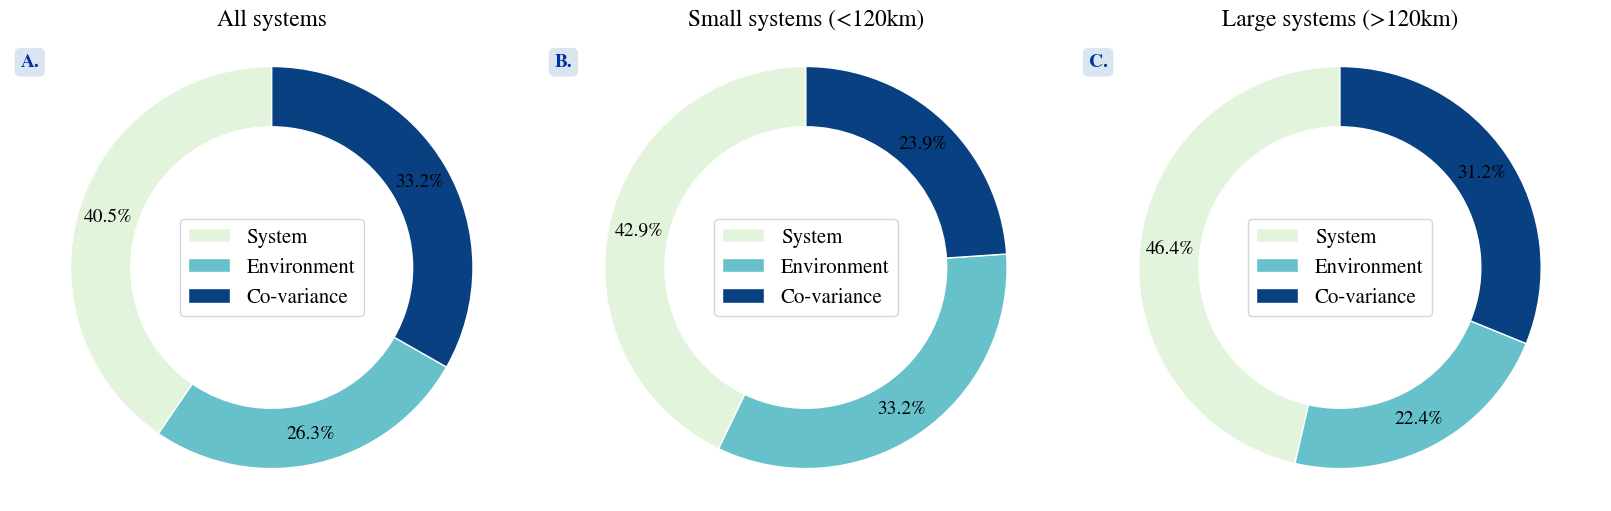

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Set up figure and axes
fig, ax = plt.subplots(1, 3, figsize=(16, 5), constrained_layout=True)

# Define color palette for pie charts
colors = [plt.get_cmap('GnBu', 10)(1), plt.get_cmap('GnBu', 10)(5), plt.get_cmap('GnBu', 10)(9)]

# Define labels and common pie chart properties
labels = ['System', 'Environment', 'Co-variance']
size = 0.3
textprops = {'color': "k", 'fontsize': 14}

# Function to create pie charts
def create_pie_chart(ax, sizes, title):
    ax.pie(sizes, autopct='%1.1f%%', startangle=90, colors=colors,
           wedgeprops=dict(width=size, edgecolor='w'),
           pctdistance=0.85, labeldistance=1.1, textprops=textprops)
    ax.axis('equal')
    ax.legend(labels=labels, loc='center', prop={'size': 15})
    ax.set_title(title)

# Pie chart for all systems
var_sys, var_env, double_co_var = dict_variances_all['var_sys'], dict_variances_all['var_env'], dict_variances_all['covar_env_vs_sys']
sizes = [var_sys, var_env, double_co_var]
create_pie_chart(ax[0], sizes, 'All systems')

# Pie chart for small systems
var_sys, var_env, double_co_var = dict_variances_small['var_sys'], dict_variances_small['var_env'], dict_variances_small['covar_env_vs_sys']
sizes = [var_sys, var_env, double_co_var]
create_pie_chart(ax[1], sizes, 'Small systems (<120km)')

# Pie chart for large systems
var_sys, var_env, double_co_var = dict_variances_big['var_sys'], dict_variances_big['var_env'], dict_variances_big['covar_env_vs_sys']
sizes = [var_sys, var_env, double_co_var]
create_pie_chart(ax[2], sizes, 'Large systems (>120km)')

# Adding labels to subplots
labels_subplots = ['A.', 'B.', 'C.']
pnas_bg_color = '#d9e6f2'  # PNAS light blue color for background
pnas_text_color = '#0033a0'  # PNAS dark blue color for text

for i, ax_subi in enumerate(ax):
    ax_subi.text(
        0.02, 0.93, labels_subplots[i],
        transform=ax_subi.transAxes,
        weight='bold',
        color=pnas_text_color,
        bbox=dict(facecolor=pnas_bg_color, edgecolor='none', boxstyle='round,pad=0.3')  # Background color with padding
    )

# Save the figure
path_to_save = os.path.join(path_figures, 'figure_5.pdf')
plt.savefig(path_to_save)
